## Algorithms testing

In [50]:
### since there was a leak asscociated earlier with the dataset for the tree based algos
### there will be two versions of this dataset,
### 1. drop the risk_score column only
### 2. drop failed_transaction_count_7d column only
### but in this one I am doing it by keeping both either or dropping the both

## Keeping the both

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Loading the data(distance and tree based)

In [2]:
df_distance = pd.read_csv('../data/distance_based.csv')
df_distance.drop('Unnamed: 0', axis = 1, inplace = True)
df_distance.head()

,transaction_type_ATM Withdrawal,transaction_type_Online,transaction_type_POS,device_type_Laptop,device_type_Mobile,location_Mumbai,location_New York,location_Sydney,location_Tokyo,merchant_Electronics,...,Account_Balance,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Age,Transaction_Distance,Risk_Score,Is_Weekend,Transaction_Amount_boxcox,Fraud_Label
0,0,0,1,1,0,0,0,1,0,0,...,0.931806,7,0.872714,3,65,0.176595,0.8494,0,0.325913,0
1,0,0,0,0,1,0,1,0,0,0,...,0.756044,13,0.956653,4,186,0.440650,0.0959,0,0.047409,1
2,0,1,0,0,0,1,0,0,0,0,...,0.010940,14,0.081653,4,226,0.381832,0.8400,0,0.286719,1
3,1,0,0,0,0,0,1,0,0,0,...,0.766918,8,0.352000,4,76,0.262339,0.7935,0,0.627847,1
4,0,0,1,0,1,1,0,0,0,1,...,0.923178,14,0.650388,4,140,0.193358,0.3819,1,0.295933,1


In [3]:
df_trees = pd.read_csv('../data/trees_based.csv')
df_trees.drop('Unnamed: 0', axis = 1, inplace = True)
df_trees.head()

,transaction_type_ATM Withdrawal,transaction_type_Online,transaction_type_POS,device_type_Laptop,device_type_Mobile,location_Mumbai,location_New York,location_Sydney,location_Tokyo,merchant_Electronics,...,Account_Balance,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Age,Transaction_Distance,Risk_Score,Is_Weekend,Transaction_Amount_boxcox,Fraud_Label
0,0,0,1,1,0,0,0,1,0,0,...,93213.17,7,437.63,3,65,883.17,0.8494,0,5.917374,0
1,0,0,0,0,1,0,1,0,0,0,...,75725.25,13,478.76,4,186,2203.36,0.0959,0,0.860767,1
2,0,1,0,0,0,1,0,0,0,0,...,1588.96,14,50.01,4,226,1909.29,0.8400,0,5.205741,1
3,1,0,0,0,0,0,1,0,0,0,...,76807.20,8,182.48,4,76,1311.86,0.7935,0,11.399354,1
4,0,0,1,0,1,1,0,0,0,1,...,92354.66,14,328.69,4,140,966.98,0.3819,1,5.373048,1


### making the train and the test data respectively

In [4]:
X_tree = df_trees.drop('Fraud_Label', axis = 1)
X_distance = df_distance.drop('Fraud_Label', axis = 1)
y = df_distance['Fraud_Label']

In [5]:
X_tree.head()

,transaction_type_ATM Withdrawal,transaction_type_Online,transaction_type_POS,device_type_Laptop,device_type_Mobile,location_Mumbai,location_New York,location_Sydney,location_Tokyo,merchant_Electronics,...,card_type_Visa,Account_Balance,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Age,Transaction_Distance,Risk_Score,Is_Weekend,Transaction_Amount_boxcox
0,0,0,1,1,0,0,0,1,0,0,...,0,93213.17,7,437.63,3,65,883.17,0.8494,0,5.917374
1,0,0,0,0,1,0,1,0,0,0,...,0,75725.25,13,478.76,4,186,2203.36,0.0959,0,0.860767
2,0,1,0,0,0,1,0,0,0,0,...,1,1588.96,14,50.01,4,226,1909.29,0.8400,0,5.205741
3,1,0,0,0,0,0,1,0,0,0,...,1,76807.20,8,182.48,4,76,1311.86,0.7935,0,11.399354
4,0,0,1,0,1,1,0,0,0,1,...,0,92354.66,14,328.69,4,140,966.98,0.3819,1,5.373048


In [6]:
X_distance.head()

,transaction_type_ATM Withdrawal,transaction_type_Online,transaction_type_POS,device_type_Laptop,device_type_Mobile,location_Mumbai,location_New York,location_Sydney,location_Tokyo,merchant_Electronics,...,card_type_Visa,Account_Balance,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Age,Transaction_Distance,Risk_Score,Is_Weekend,Transaction_Amount_boxcox
0,0,0,1,1,0,0,0,1,0,0,...,0,0.931806,7,0.872714,3,65,0.176595,0.8494,0,0.325913
1,0,0,0,0,1,0,1,0,0,0,...,0,0.756044,13,0.956653,4,186,0.440650,0.0959,0,0.047409
2,0,1,0,0,0,1,0,0,0,0,...,1,0.010940,14,0.081653,4,226,0.381832,0.8400,0,0.286719
3,1,0,0,0,0,0,1,0,0,0,...,1,0.766918,8,0.352000,4,76,0.262339,0.7935,0,0.627847
4,0,0,1,0,1,1,0,0,0,1,...,0,0.923178,14,0.650388,4,140,0.193358,0.3819,1,0.295933


In [7]:
y.head()

0    0
1    1
2    1
3    1
4    1
Name: Fraud_Label, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split
X_train_distance, X_test_distance, y_train_distance, y_test_distance = train_test_split(X_distance, y, random_state = 42, test_size = 0.25)

In [54]:
X_train_tree, X_test_tree, y_train_tree, y_test_tree = train_test_split(X_tree, y, test_size = 0.25, random_state = 42, shuffle = True)

In [10]:
print(f"{X_train_distance.shape} : {X_test_distance.shape} :: {y_train_distance.shape} : {y_test_distance.shape}")

(37500, 28) : (12500, 28) :: (37500,) : (12500,)


In [11]:
print(f"{X_train_tree.shape} : {X_test_tree.shape} :: {y_train_tree.shape} : {y_test_tree.shape}")

(37500, 28) : (12500, 28) :: (37500,) : (12500,)


### writing the general algorithm and metrices and plot functions

In [12]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

In [13]:
def metrices(y_test, y_pred) : 
    print(f"Accuracy score : {accuracy_score(y_test, y_pred)}")
    print(f"Confusion matrix : ")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

In [14]:
def plot_graphs(y_test, y_pred, y_prob = None) : 
    plt.figure(figsize = (10, 6))
    plt.subplot(1, 2, 1)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    
    # --- 2️⃣ ROC Curve (only for binary classification) ---
    if y_prob is not None and len(set(y_test)) == 2:
        plt.subplot(1, 2, 2)
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='red', linestyle='--')
        plt.title('ROC Curve')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc="lower right")
    else:
        plt.subplot(1, 2, 2)
        sns.histplot(y_pred, color='purple', bins=len(set(y_pred)))
        plt.title('Predicted Class Distribution')
        plt.xlabel('Predicted Class')
        plt.ylabel('Count')

    plt.tight_layout()
    plt.show()

In [15]:
def pred_and_plot(X_train, X_test, y_train, y_test, model) : 
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    metrices(y_test, y_pred)
    plot_graphs(y_test, y_pred)

### Prediction time

### Distance based algos

### 1. Logistic regression

In [16]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter = 1000)

Accuracy score : 0.80264
Confusion matrix : 
[[7434 1014]
 [1453 2599]]
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      8448
           1       0.72      0.64      0.68      4052

    accuracy                           0.80     12500
   macro avg       0.78      0.76      0.77     12500
weighted avg       0.80      0.80      0.80     12500



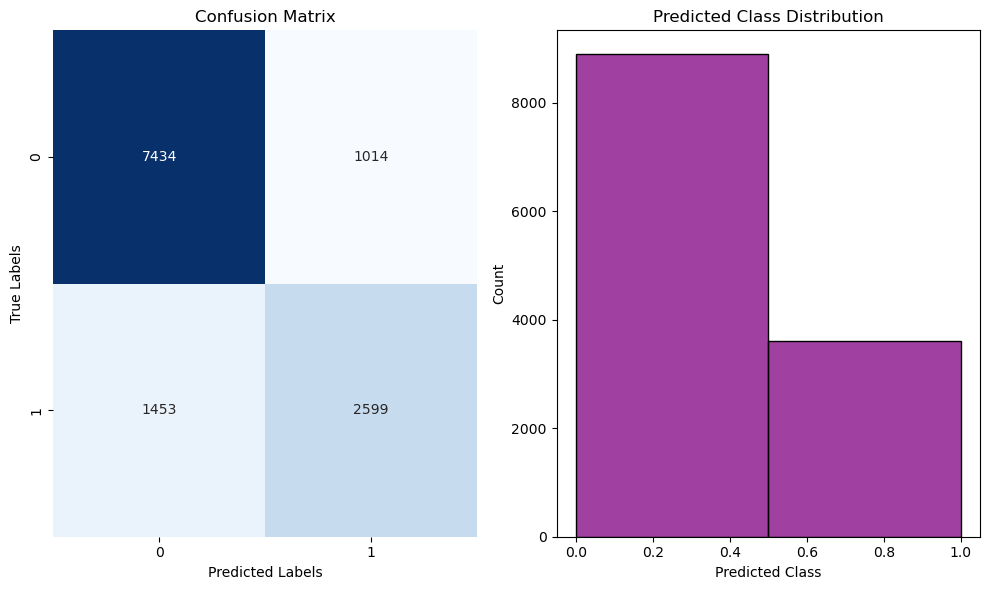

In [17]:
pred_and_plot(X_train_distance, X_test_distance, y_train_distance, y_test_distance, model = lr)

### 2. SVC

In [18]:
from sklearn.svm import SVC
svc = SVC()

Accuracy score : 0.77632
Confusion matrix : 
[[8448    0]
 [2796 1256]]
              precision    recall  f1-score   support

           0       0.75      1.00      0.86      8448
           1       1.00      0.31      0.47      4052

    accuracy                           0.78     12500
   macro avg       0.88      0.65      0.67     12500
weighted avg       0.83      0.78      0.73     12500



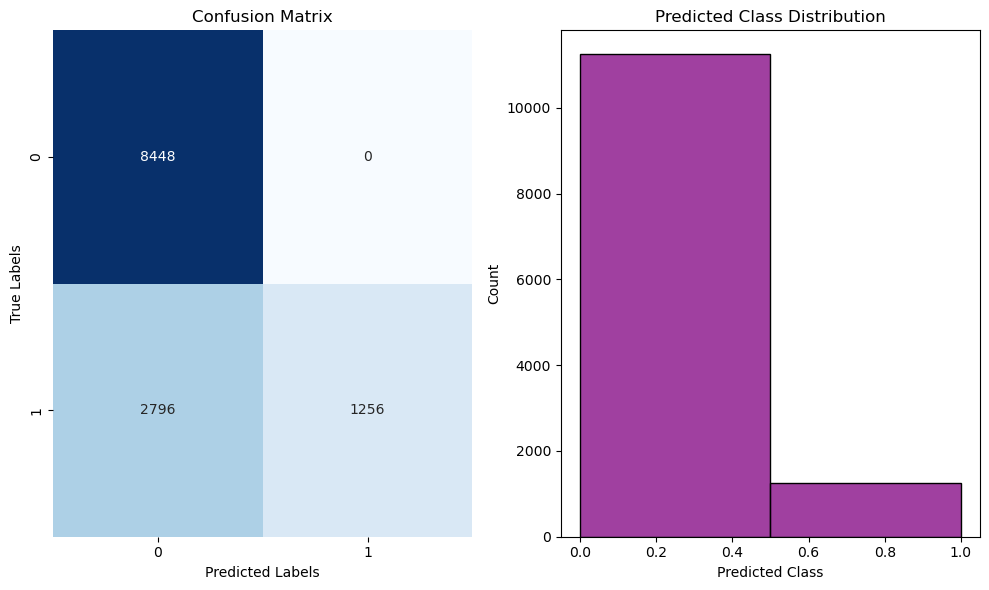

In [19]:
pred_and_plot(X_train_distance, X_test_distance, y_train_distance, y_test_distance, model = svc)

### 3. KNN

In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

Accuracy score : 0.81616
Confusion matrix : 
[[7870  578]
 [1720 2332]]
              precision    recall  f1-score   support

           0       0.82      0.93      0.87      8448
           1       0.80      0.58      0.67      4052

    accuracy                           0.82     12500
   macro avg       0.81      0.75      0.77     12500
weighted avg       0.81      0.82      0.81     12500



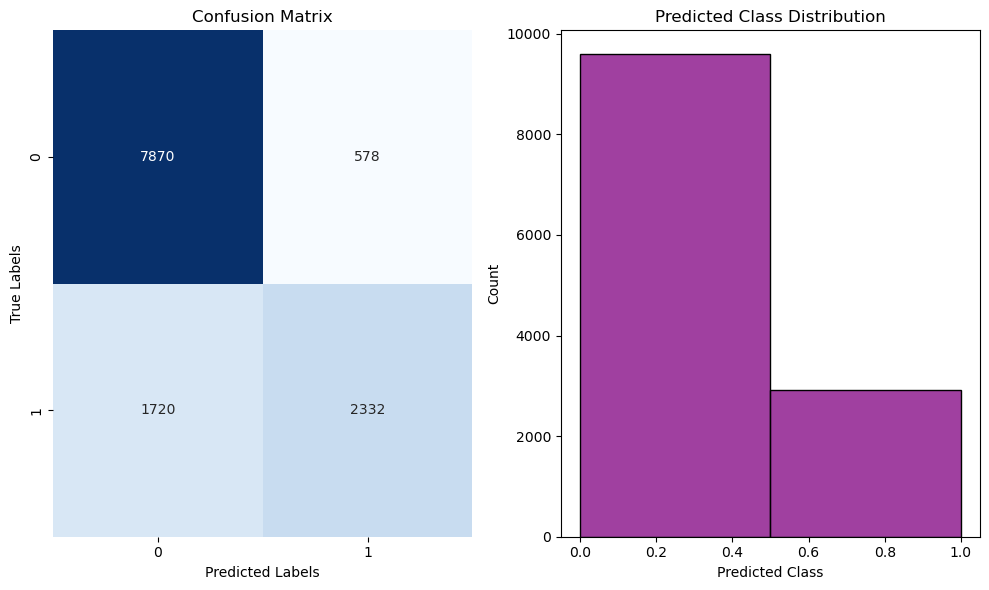

In [55]:
pred_and_plot(X_train_distance, X_test_distance, y_train_distance, y_test_distance, model = knn)

### Probablity based algo
### Navie Baye

In [22]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

Accuracy score : 0.87808
Confusion matrix : 
[[8448    0]
 [1524 2528]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      8448
           1       1.00      0.62      0.77      4052

    accuracy                           0.88     12500
   macro avg       0.92      0.81      0.84     12500
weighted avg       0.90      0.88      0.87     12500



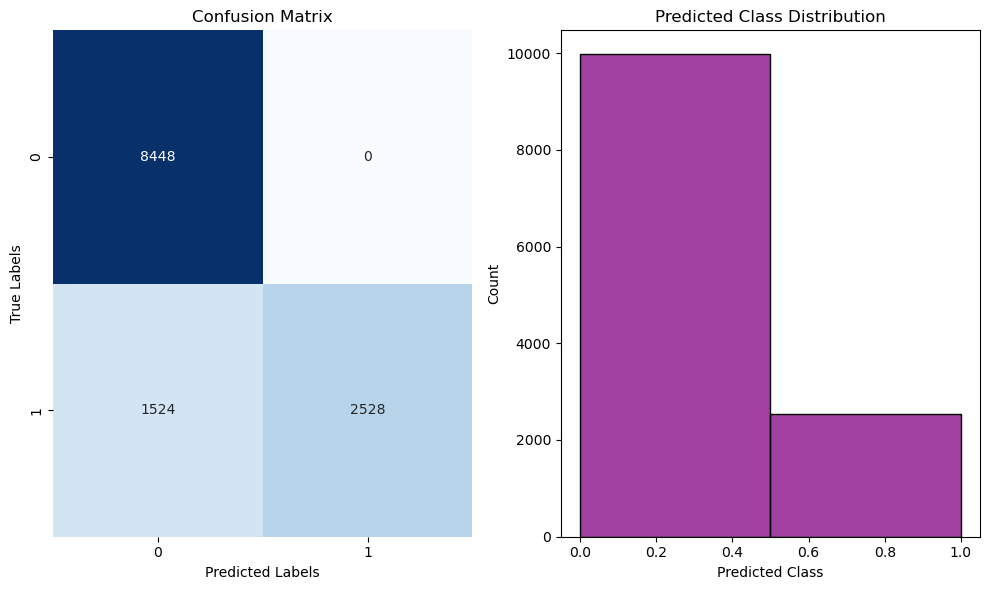

In [23]:
pred_and_plot(X_train_tree, X_test_tree, y_train_tree, y_test_tree, model = nb)

### Tree based algos

In [53]:
# X_train_tree.head()

In [35]:
# X_train_tree.drop(['Failed_Transaction_Count_7d', 'Risk_Score'], axis = 1, inplace = True)
# X_test_tree.drop(['Failed_Transaction_Count_7d', 'Risk_Score'], axis = 1, inplace = True)

In [51]:
# X_train_tree, X_test_tree, y_train_tree, y_test_tree = train_test_split(X_tree, y, random_state = 42, test_size = 0.25)

In [42]:
# X_train_tree.drop('Risk_Score', axis = 1, inplace = True)
# X_test_tree.drop('Risk_Score', axis = 1, inplace = True)

In [52]:
# X_train_tree.drop('Failed_Transaction_Count_7d', axis = 1, inplace = True)
# X_test_tree.drop('Failed_Transaction_Count_7d', axis = 1, inplace = True)

### 1. Decision Tree

In [56]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

Accuracy score : 1.0
Confusion matrix : 
[[8448    0]
 [   0 4052]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8448
           1       1.00      1.00      1.00      4052

    accuracy                           1.00     12500
   macro avg       1.00      1.00      1.00     12500
weighted avg       1.00      1.00      1.00     12500



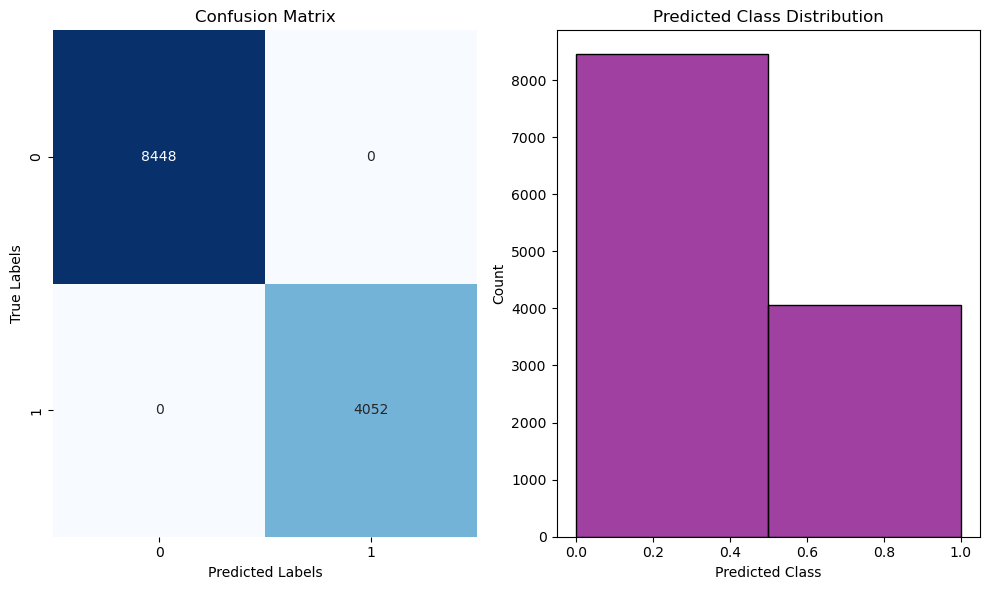

In [57]:
pred_and_plot(X_train_tree, X_test_tree, y_train_tree, y_test_tree, model = dtc)

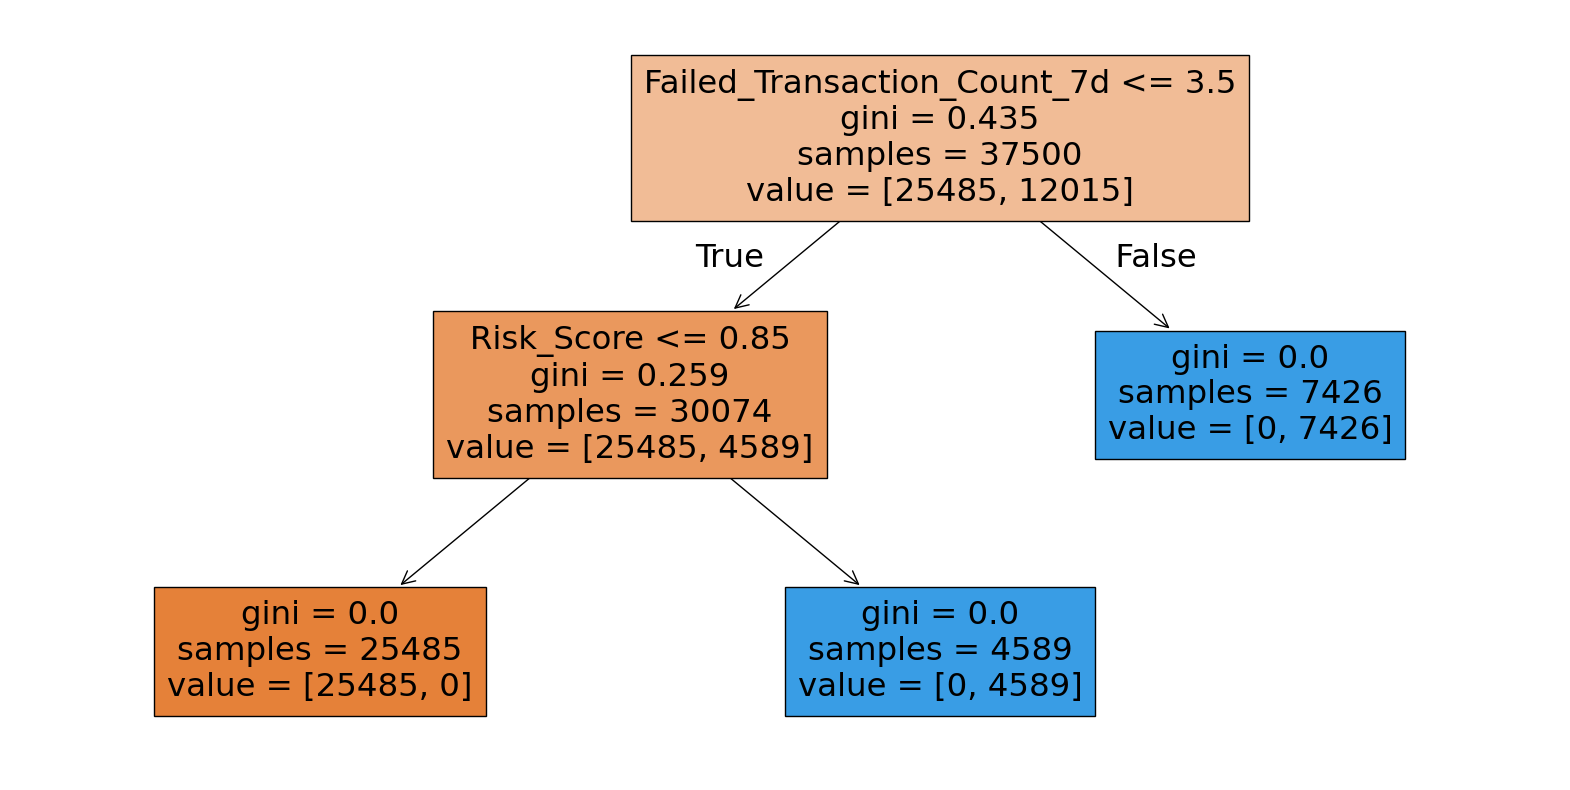

In [58]:
from sklearn import tree
plt.figure(figsize=(20,10))
tree.plot_tree(dtc, max_depth=3, feature_names=X_train_tree.columns, filled=True)
plt.show()

### 2. Random forest classifier

In [59]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

Accuracy score : 1.0
Confusion matrix : 
[[8448    0]
 [   0 4052]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8448
           1       1.00      1.00      1.00      4052

    accuracy                           1.00     12500
   macro avg       1.00      1.00      1.00     12500
weighted avg       1.00      1.00      1.00     12500



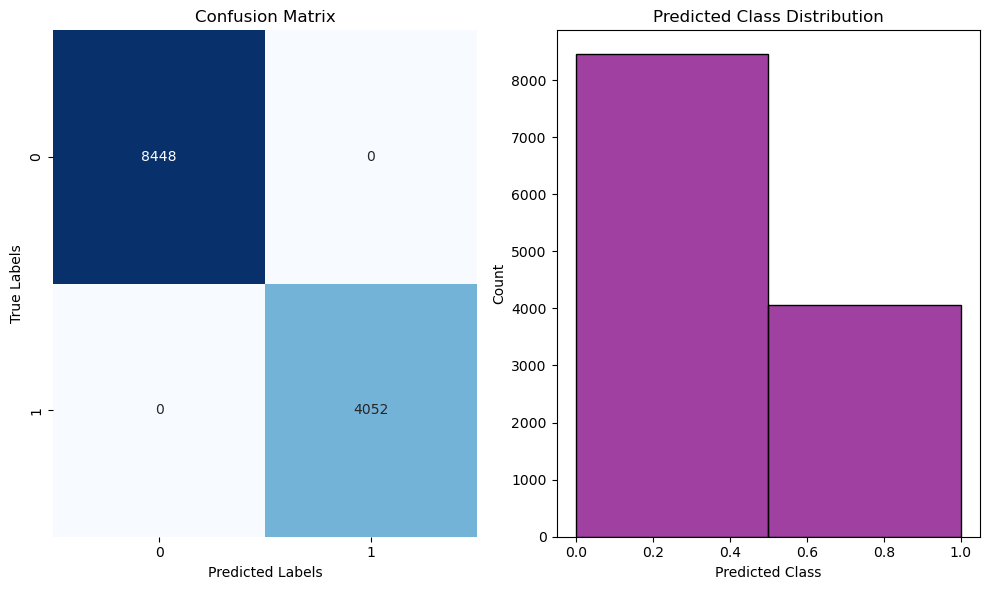

In [60]:
pred_and_plot(X_train_tree, X_test_tree, y_train_tree, y_test_tree, model = rfc)

### 3. Adaboost classifier

In [61]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier()

c:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy score : 1.0
Confusion matrix : 
[[8448    0]
 [   0 4052]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8448
           1       1.00      1.00      1.00      4052

    accuracy                           1.00     12500
   macro avg       1.00      1.00      1.00     12500
weighted avg       1.00      1.00      1.00     12500



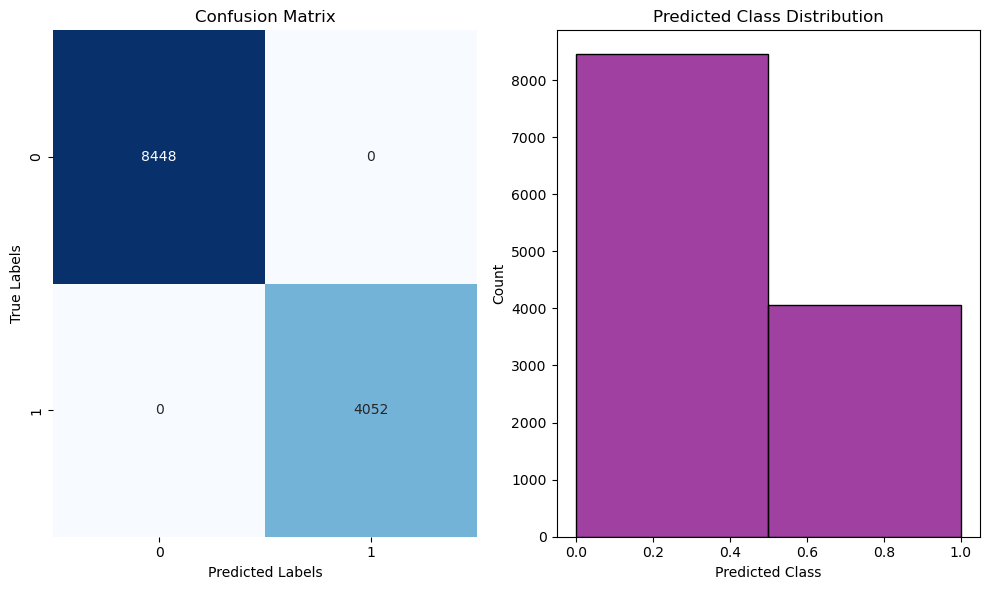

In [62]:
pred_and_plot(X_train_tree, X_test_tree, y_train_tree, y_test_tree, model = abc)

### 4. Gradient boost

In [63]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()

Accuracy score : 1.0
Confusion matrix : 
[[8448    0]
 [   0 4052]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8448
           1       1.00      1.00      1.00      4052

    accuracy                           1.00     12500
   macro avg       1.00      1.00      1.00     12500
weighted avg       1.00      1.00      1.00     12500



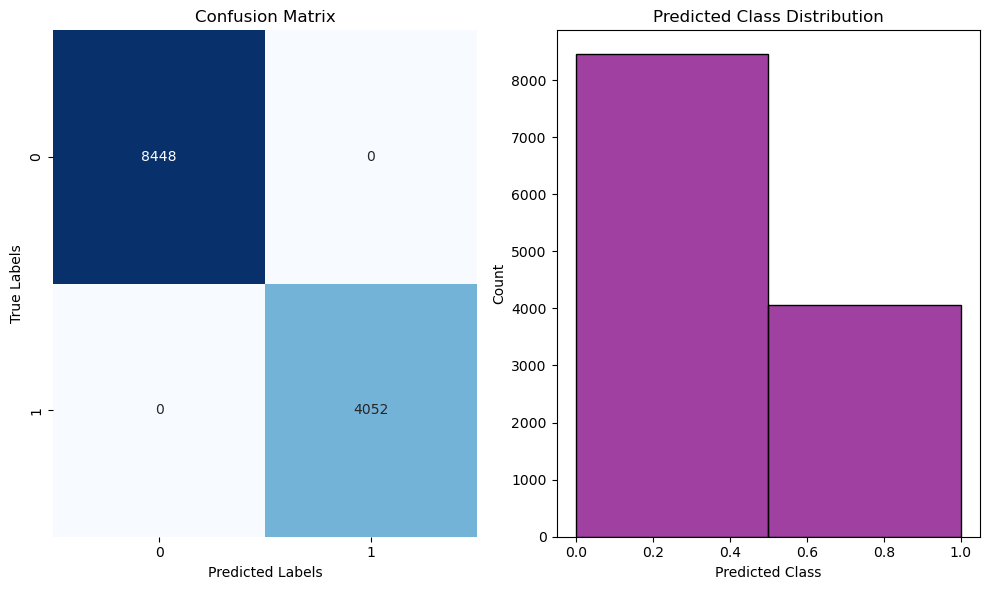

In [64]:
pred_and_plot(X_train_tree, X_test_tree, y_train_tree, y_test_tree, model = gbc)

### Deep learning algo : ANN

In [65]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [82]:
model = Sequential()

In [83]:
model.add(Dense(64, activation = 'relu', kernel_initializer = 'he_uniform', input_dim = X_train_distance.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(128, activation = 'relu', kernel_initializer = 'he_normal'))
model.add(Dropout(0.2))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy']) 

c:\Users\lenovo\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [84]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                │ (None, 64)             │         1,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,497 (72.25 KB)

 Trainable params: 18,497 (72.25 KB)

 Non-trainable params: 0 (0.00 B)

In [85]:
model.fit(X_train_distance, y_train_distance, batch_size = 64, epochs = 20, validation_split = 0.20)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5823 - loss: 2.9789 - val_accuracy: 0.6812 - val_loss: 0.6093
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6358 - loss: 0.7395 - val_accuracy: 0.6889 - val_loss: 0.6047
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6750 - loss: 0.6406 - val_accuracy: 0.7423 - val_loss: 0.5296
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7368 - loss: 0.5666 - val_accuracy: 0.8227 - val_loss: 0.4624
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7754 - loss: 0.5040 - val_accuracy: 0.7895 - val_loss: 0.4785
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8019 - loss: 0.4648 - val_accuracy: 0.8460 - val_loss: 0.4038
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8160 - loss: 0.4341 - val_accuracy: 0.8483 - val_loss: 0.3840
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8303 - loss: 0.4042 - val_accuracy: 0.

In [99]:
y_pred_ann = model.predict(X_test_distance)

391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 748us/step


### taking threshold as 0.5

In [100]:
y_pred_ann_1 = (y_pred_ann > 0.5).astype(int)

In [101]:
metrices(y_test_distance, y_pred_ann_1)

Accuracy score : 0.96328
Confusion matrix : 
[[8434   14]
 [ 445 3607]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      8448
           1       1.00      0.89      0.94      4052

    accuracy                           0.96     12500
   macro avg       0.97      0.94      0.96     12500
weighted avg       0.96      0.96      0.96     12500



In [106]:
y_pred_flat = y_pred_ann_1.flatten()

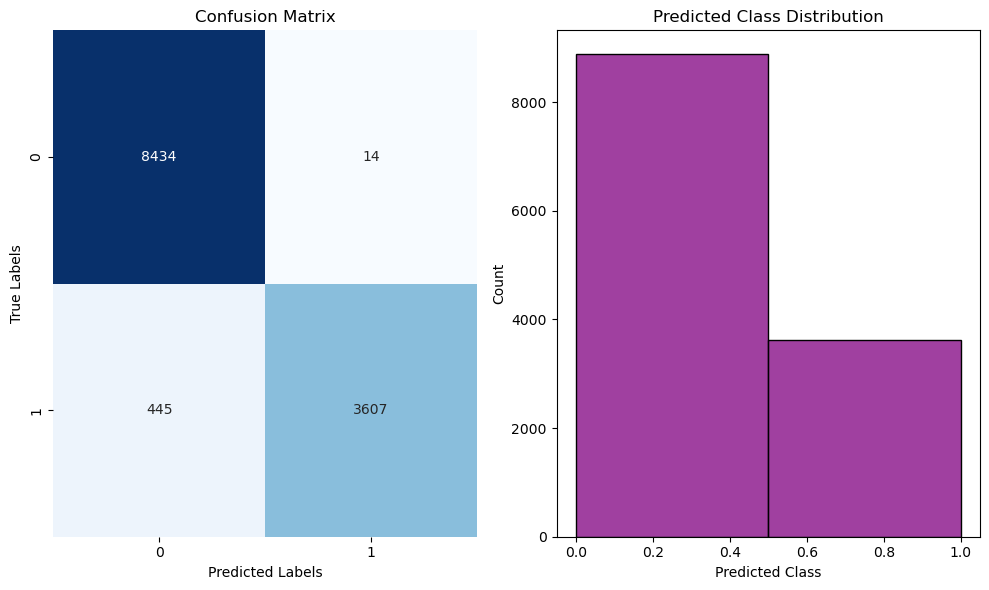

In [107]:
plot_graphs(y_test_distance, y_pred_flat)

### taking threshold as 0.3

In [108]:
y_pred_ann_2 = (y_pred_ann > 0.3).astype(int)

In [109]:
metrices(y_test_distance, y_pred_ann_2)

Accuracy score : 0.97472
Confusion matrix : 
[[8335  113]
 [ 203 3849]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      8448
           1       0.97      0.95      0.96      4052

    accuracy                           0.97     12500
   macro avg       0.97      0.97      0.97     12500
weighted avg       0.97      0.97      0.97     12500



In [110]:
y_pred_flat = y_pred_ann_2.flatten()

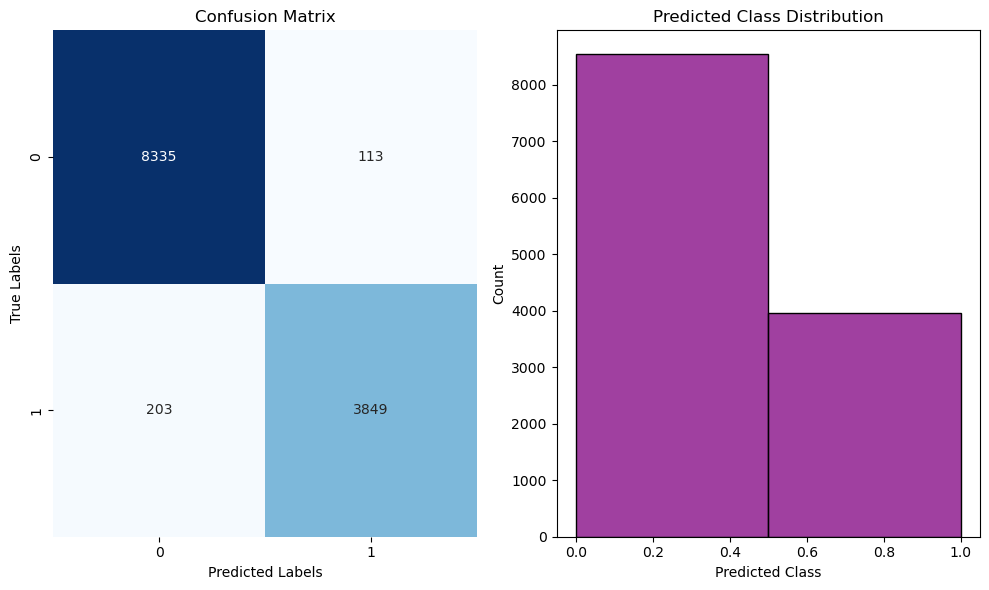

In [111]:
plot_graphs(y_test_distance, y_pred_flat)